In [1]:
#standard
import numpy as np
import pandas as pd
#vizualizatio
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%matplotlib inline

In [3]:
# modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, auc, classification_report, precision_recall_curve, average_precision_score
from sklearn import preprocessing
import statsmodels.api as sm

C:\Users\Irshad-PC\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
df = pd.read_csv('E:/naviRisk/work/naviriskMacro.csv')
#df = pd.read_csv('E:/naviRisk/Sample.csv')
print(df.shape)
df.head()

(21652, 20)


,PH_st_cd,PH_zip_cd,TRD_val_date,PD_Qual_ind,PD_Prod_code,PD_issue_date,GDP-0,corpbnd0,CDrate0,Trsry5rate0,Trsry10rate-3,StkSNPrate0,CPI0,Unemp_indx0,HPI0,Mrtgrate0,terminateYr,terminateMonth,churn_status,PD_Pol_status
0,NH,3465,31/12/03,Q,SPFA2,31/01/03,3.3,0.0517,0.030600,0.032475,0.04192,1141.780,188.0,5.6,9.438824,5.8300,2004,4,1,Inforce
1,FL,33716,31/12/03,Q,SPFA2,"Tuesday, December 2, 2003",3.3,0.0478,0.036100,0.033625,0.04745,1118.205,189.9,5.4,10.012157,5.7540,2004,9,1,Inforce
2,CA,92376,31/12/03,Q,SPFA2,"Sunday, November 2, 2003",3.3,0.0538,0.036125,0.039375,0.03858,1132.340,189.7,5.6,9.438824,6.2875,2004,6,1,Inforce
3,IL,60660,31/12/03,Q,SPFA2,19/02/03,3.3,0.0494,0.035660,0.034680,0.04346,1166.964,191.0,5.4,10.220980,5.7300,2004,11,1,Inforce
4,TN,37643,31/12/03,Q,SPFA2,24/02/03,3.3,0.0482,0.036600,0.035440,0.04668,1086.294,189.5,5.4,10.012157,5.8675,2004,8,1,Inforce


In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
nemericdf = df.select_dtypes(include=numerics)

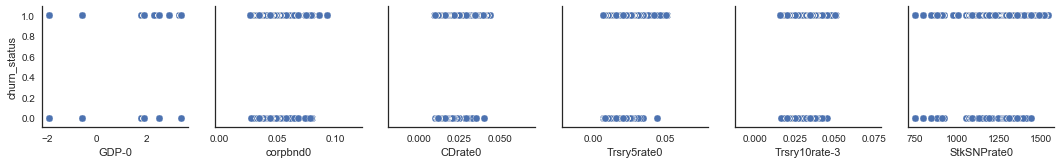

In [14]:
corrPlt = sbn.pairplot(data=nemericdf,
                  y_vars=['churn_status'],
                  x_vars=['GDP-0', 'corpbnd0', 'CDrate0', 'Trsry5rate0', 'Trsry10rate-3',
       'StkSNPrate0'])

In [15]:
#correlation MAtrix
np.random.seed(1)

corr_matrix = nemericdf[nemericdf.columns].corr()
corr_matrix

,GDP-0,corpbnd0,CDrate0,Trsry5rate0,Trsry10rate-3,StkSNPrate0,CPI0,Unemp_indx0,HPI0,Mrtgrate0,terminateYr,terminateMonth,churn_status
GDP-0,1.000000,-0.717307,-0.412755,-0.256308,-0.147129,0.729914,0.534071,-0.082425,0.338924,-0.387621,0.511266,0.039173,0.006055
corpbnd0,-0.717307,1.000000,0.782182,0.615574,0.559771,-0.794030,-0.737522,-0.113915,-0.605057,0.793177,-0.790126,-0.227545,-0.052921
CDrate0,-0.412755,0.782182,1.000000,0.908931,0.804489,-0.438092,-0.873473,-0.389870,-0.316006,0.941256,-0.943956,-0.162771,-0.036181
Trsry5rate0,-0.256308,0.615574,0.908931,1.000000,0.789432,-0.262341,-0.768427,-0.247244,-0.315493,0.940671,-0.832930,-0.267709,-0.060922
Trsry10rate-3,-0.147129,0.559771,0.804489,0.789432,1.000000,-0.364172,-0.599256,-0.036402,-0.527699,0.837512,-0.743383,-0.147157,-0.030873
StkSNPrate0,0.729914,-0.794030,-0.438092,-0.262341,-0.364172,1.000000,0.582162,-0.342956,0.613534,-0.445888,0.575609,0.070173,0.038886
CPI0,0.534071,-0.737522,-0.873473,-0.768427,-0.599256,0.582162,1.000000,0.267906,0.187654,-0.773928,0.933230,0.140007,0.044745
Unemp_indx0,-0.082425,-0.113915,-0.389870,-0.247244,-0.036402,-0.342956,0.267906,1.000000,-0.492252,-0.216617,0.281327,-0.014135,-0.035582
HPI0,0.338924,-0.605057,-0.316006,-0.315493,-0.527699,0.613534,0.187654,-0.492252,1.000000,-0.524887,0.331293,0.206879,0.069923
Mrtgrate0,-0.387621,0.793177,0.941256,0.940671,0.837512,-0.445888,-0.773928,-0.216617,-0.524887,1.000000,-0.877853,-0.281958,-0.065749


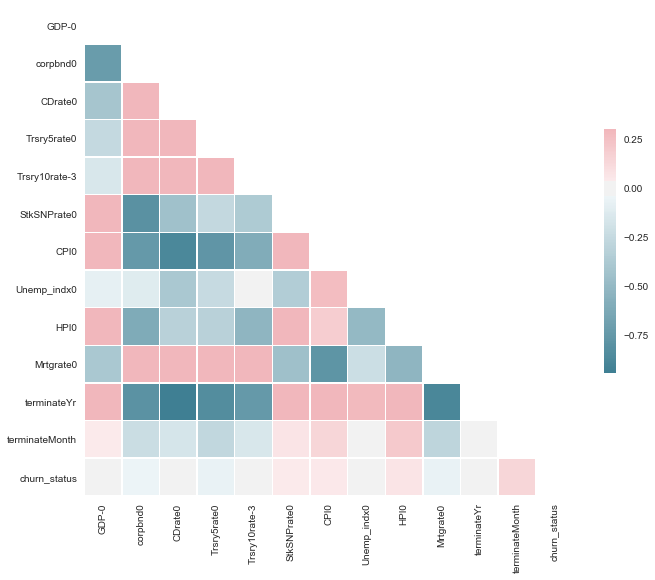

In [16]:
sbn.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sbn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sbn.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

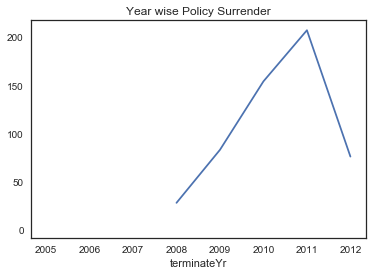

In [17]:
group_Yr = nemericdf.groupby(['terminateYr', 'churn_status']).size().unstack()
group_Yr
aa=group_Yr[0]
plt.title('Year wise Policy Surrender')
aa.plot()


In [36]:
#group_ql = nemericdf.groupby(['terminateYr','Unemp_indx0']).sum().unstack()
#group_ql = nemericdf.groupby(['terminateYr','Unemp_indx0']).['Unemp_indx0'].agg('sum')
group_ql = df.groupby(['terminateYr', 'Unemp_indx0'])['Unemp_indx0'].size().unstack()
group_ql
#aa=group_Yr[0]
#plt.title('Year wise Policy Surrender')
#aa.plot()
#group_ql.plot.pie(subplots=True,figsize=(8, 3))

Unemp_indx0,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,...,8.9,9.0,9.1,9.3,9.4,9.5,9.6,9.8,9.9,10.0
terminateYr,,,,,,,,,,,,,,,,,,,,,
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,NaN,31.0,37.0,8.0,10.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,64.0,27.0,41.0,128.0,23.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,46.0,34.0,97.0,90.0,NaN,NaN,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,73.0,59.0,76.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,347.0,NaN,NaN,240.0,554.0,113.0,292.0,407.0,253.0
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,276.0,405.0,1491.0,205.0,600.0,615.0,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1195.0,3953.0,1224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


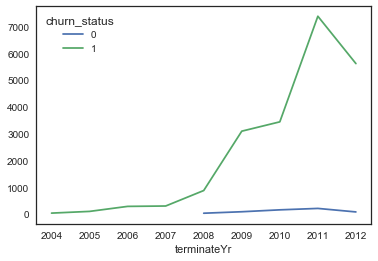

In [10]:
group_Yr.plot()

In [45]:
#group_Yr.set_index(['churn_status']).sort_index()

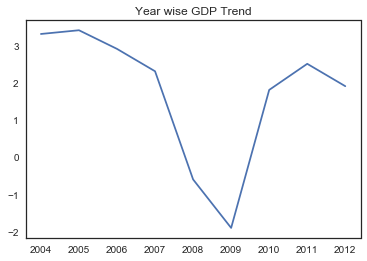

In [11]:
#GDP goes down drastically in the year 2009
plt.plot(nemericdf['terminateYr'], nemericdf['GDP-0'])
plt.title('Year wise GDP Trend')
plt.show()

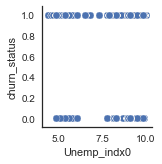

In [23]:
#unemp_churn = nemericdf.groupby(['Unemp_indx0', 'churn_status']).size().unstack()
#unemp_churn
corrPltee = sbn.pairplot(data=nemericdf,
                  y_vars=['churn_status'],
                  x_vars=['Unemp_indx0'])

#group_unemp = nemericdf.groupby(['Unemp_indx0', 'churn_status']).size().unstack()
#group_unemp
#group_unemp.plot()

(array([ 654.,  311.,  100.,  292.,   48.,  208., 6222., 1647., 7640.,
        4530.]),
 array([ 4.4 ,  4.96,  5.52,  6.08,  6.64,  7.2 ,  7.76,  8.32,  8.88,
         9.44, 10.  ]),
 <a list of 10 Patch objects>)

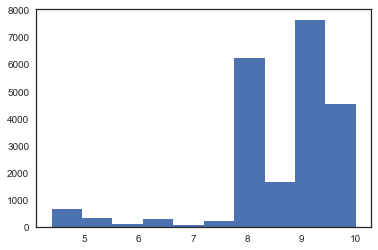

In [27]:
plt.hist(nemericdf['Unemp_indx0'])

In [32]:
def unemp_status (row):
   if row['Unemp_indx0'] < 5 :
      return 'Low'
   if row['Unemp_indx0'] < 8 :
      return 'Medium'
   return 'High'
df['Unemp_level'] = df.apply (lambda row: unemp_status (row),axis=1)
df.head()

,PH_st_cd,PH_zip_cd,TRD_val_date,PD_Prod_code,PD_issue_date,GDP-0,corpbnd0,CDrate0,Trsry5rate0,Trsry10rate-3,StkSNPrate0,CPI0,Unemp_indx0,HPI0,Mrtgrate0,terminateYr,terminateMonth,churn_status,PD_Pol_status,Unemp_level
0,NH,3465,31/12/03,SPFA2,31/01/03,3.3,0.0517,0.030600,0.032475,0.04192,1141.780,188.0,5.6,9.438824,5.8300,2004,4,1,Inforce,Medium
1,FL,33716,31/12/03,SPFA2,"Tuesday, December 2, 2003",3.3,0.0478,0.036100,0.033625,0.04745,1118.205,189.9,5.4,10.012157,5.7540,2004,9,1,Inforce,Medium
2,CA,92376,31/12/03,SPFA2,"Sunday, November 2, 2003",3.3,0.0538,0.036125,0.039375,0.03858,1132.340,189.7,5.6,9.438824,6.2875,2004,6,1,Inforce,Medium
3,IL,60660,31/12/03,SPFA2,19/02/03,3.3,0.0494,0.035660,0.034680,0.04346,1166.964,191.0,5.4,10.220980,5.7300,2004,11,1,Inforce,Medium
4,TN,37643,31/12/03,SPFA2,24/02/03,3.3,0.0482,0.036600,0.035440,0.04668,1086.294,189.5,5.4,10.012157,5.8675,2004,8,1,Inforce,Medium


Text(3,20,'Surrender tendancy is More when the Unemployment level is high')

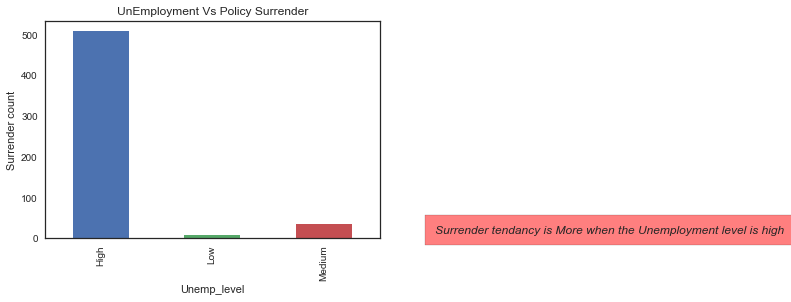

In [163]:
group_unempLvl = df.groupby(['Unemp_level', 'churn_status']).size().unstack()
group_unempLvl=group_unempLvl[0]
plt.title('UnEmployment Vs Policy Surrender')
unepm = group_unempLvl.plot.bar()
unepm.set_ylabel("Surrender count")
unepm.text(3, 20, 'Surrender tendancy is More when the Unemployment level is high', style='italic',verticalalignment='center',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})


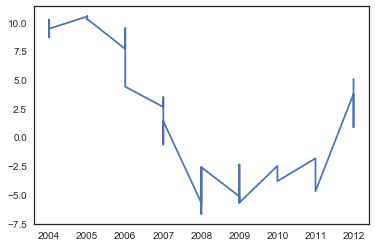

In [125]:

plt.plot(df['terminateYr'], df['HPI0'])
plt.show()

#unepm = group_unempLvl.plot.bar()
#unepm.set_ylabel("Surrender count")
#plt.text(3, 20, 'HPI dip marginally from 2014 till 2009 and in the year 2010 & 2011 stays same but marginally increase afterwards', style='italic',verticalalignment='center',
        #bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

In [130]:


def hpi_level (row):
   if row['Unemp_indx0'] < 2 :
      return 'Low'
   if row['Unemp_indx0'] < 7 :
      return 'Medium'
   return 'High'
df['HPI_Level'] = df.apply (lambda row: hpi_level (row),axis=1)
df.head()

#group_hpi = group_hpi.plot.bar()

,PH_st_cd,PH_zip_cd,TRD_val_date,PD_Prod_code,PD_issue_date,GDP-0,corpbnd0,CDrate0,Trsry5rate0,Trsry10rate-3,StkSNPrate0,CPI0,Unemp_indx0,HPI0,Mrtgrate0,terminateYr,terminateMonth,churn_status,PD_Pol_status,Unemp_level
0,NH,3465,31/12/03,SPFA2,31/01/03,3.3,0.0517,0.030600,0.032475,0.04192,1141.780,188.0,5.6,Medium,5.8300,2004,4,1,Inforce,Medium
1,FL,33716,31/12/03,SPFA2,"Tuesday, December 2, 2003",3.3,0.0478,0.036100,0.033625,0.04745,1118.205,189.9,5.4,Medium,5.7540,2004,9,1,Inforce,Medium
2,CA,92376,31/12/03,SPFA2,"Sunday, November 2, 2003",3.3,0.0538,0.036125,0.039375,0.03858,1132.340,189.7,5.6,Medium,6.2875,2004,6,1,Inforce,Medium
3,IL,60660,31/12/03,SPFA2,19/02/03,3.3,0.0494,0.035660,0.034680,0.04346,1166.964,191.0,5.4,Medium,5.7300,2004,11,1,Inforce,Medium
4,TN,37643,31/12/03,SPFA2,24/02/03,3.3,0.0482,0.036600,0.035440,0.04668,1086.294,189.5,5.4,Medium,5.8675,2004,8,1,Inforce,Medium


Text(3,20,'Surrender tendancy is More when the Unemployment level is high')

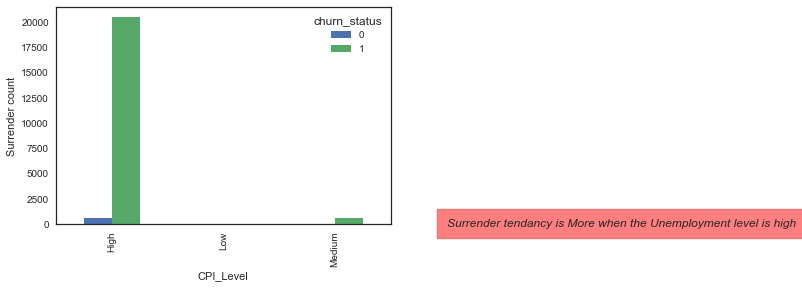

In [166]:

def cpi_level (row):
   if row['CPI0'] < 190 :
      return 'Low'
   if row['CPI0'] < 210 :
      return 'Medium'
   return 'High'
df['CPI_Level'] = df.apply (lambda row: cpi_level (row),axis=1)


group_unempLvl = df.groupby(['CPI_Level','churn_status']).size().unstack()
group_unempLvl=group_unempLvl
group_unempLvl
plt.title('UnEmployment Vs Policy Surrender')
unepm = group_unempLvl.plot.bar()
unepm.set_ylabel("Surrender count")
unepm.text(3, 20, 'Surrender tendancy is More when the Unemployment level is high', style='italic',verticalalignment='center',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})


Text(3,20,'Surrender tendancy is More when the Mortagage Increses')

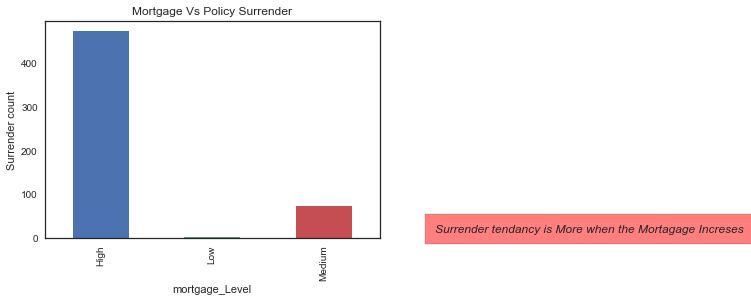

In [167]:
def mortgage_level (row):
   if row['Mrtgrate0'] < 3.5 :
      return 'Low'
   if row['Mrtgrate0'] < 4 :
      return 'Medium'
   return 'High'
df['mortgage_Level'] = df.apply (lambda row: mortgage_level (row),axis=1)

mrtg_Lvl = df.groupby(['mortgage_Level','churn_status']).size().unstack()
mrtg_Lvl=mrtg_Lvl[0]
mrtg_Lvl
plt.title('Mortgage Vs Policy Surrender')
mrtg = mrtg_Lvl.plot.bar()
mrtg.set_ylabel("Surrender count")
mrtg.text(3, 20, 'Surrender tendancy is More when the Mortagage Increses', style='italic',verticalalignment='center',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})


#plt.plot(df['mortgage_Level'], df['Mrtgrate0'])
#plt.show()


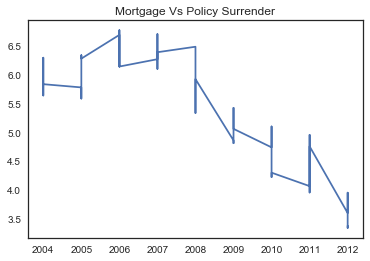

In [169]:
plt.title('Mortgage Vs Policy Surrender')
plt.plot(df['terminateYr'], df['Mrtgrate0'])
plt.show()
